In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [23]:
df = pd.read_csv("ML471_S1_Datafile_Practice.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Open,High,Low,Close,Volume
0,2006-01-03,34.29,34.29,33.20,33.52,3011402
1,2006-01-04,33.43,33.85,33.42,33.82,2608419
2,2006-01-05,33.82,34.20,33.73,33.86,1964803
3,2006-01-06,34.23,34.30,33.81,34.06,5064600
4,2006-01-09,34.00,34.74,33.99,34.71,6648959


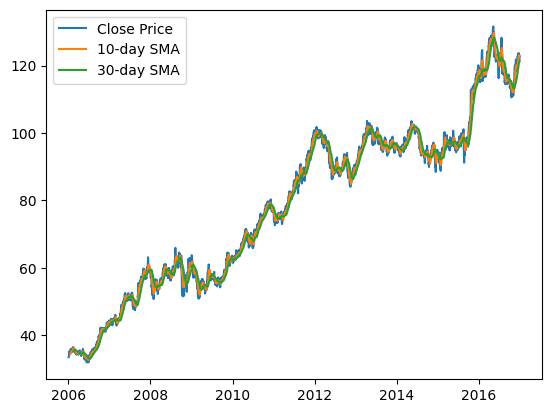

In [24]:
plt.plot(df["Date"], df["Close"], label="Close Price")
sma_10_day = df["Close"].rolling(window=10).mean()
plt.plot(df["Date"], sma_10_day, label="10-day SMA")
sma_30_day = df["Close"].rolling(window=30).mean()
plt.plot(df["Date"], sma_30_day, label="30-day SMA")
plt.legend()

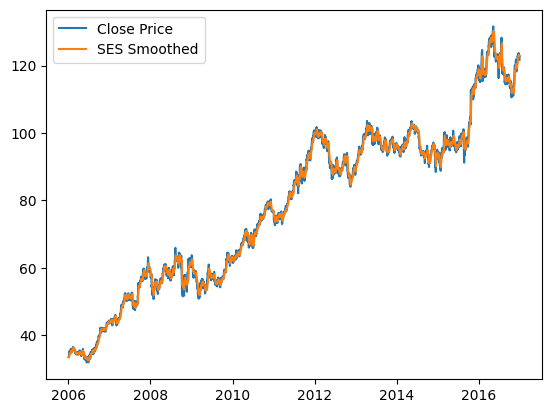

In [31]:
df["SES"] = SimpleExpSmoothing(df["Close"]).fit(
    smoothing_level=0.3,
    optimized=False
).fittedvalues
plt.plot(df["Date"], df["Close"], label="Close Price")
plt.plot(df["Date"], df["SES"], label="SES Smoothed")
plt.legend()